In [1]:
# Include some libraries
from prelims import DGPrelims
from odetools import ForwardEulerSolver
import numpy as np

Below is the necessary code to set up DGPrelims to solve a system with order $n$ and with $m$ subintervals, over the interval $(-1, 1)$:

In [2]:
n = 4
m = 128

dg = DGPrelims(n, m, is_periodic=True)

Thats it! Now, we can set the problem up for the Burgers' equation:

In [3]:
def f(u):
    return u ** 2 / 2

def u0(x):
    return np.exp(-10 * x ** 2)

initial_u = u0(dg.x)

RHS = lambda u, t: dg.RHS(f, u)

Now, setup an ODE solver to solve the system.

In [4]:
t_domain = (0, .7)
NT = 10 * m
ode_solver = ForwardEulerSolver(NT, t_domain)

Finally, lets take a look at the solution:

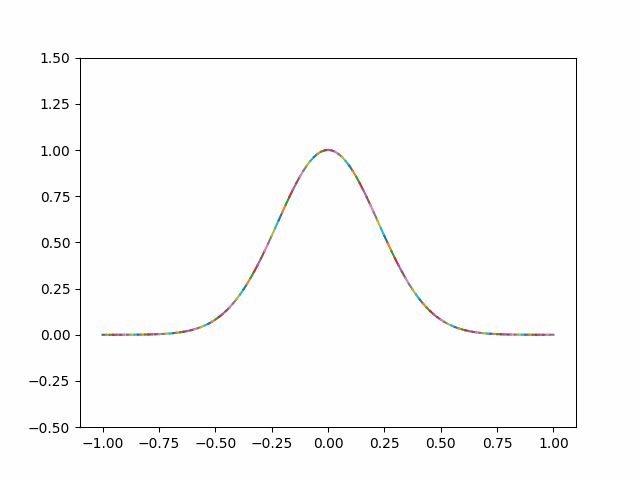

In [5]:
import matplotlib.pyplot as plt
from animate import animate

@animate
def animation():
    for u, t in ode_solver.solve(RHS, initial_u, pause_every=50):
        # Create a new figure and plot
        plt.figure()
        plt.plot(dg.x, u)
        plt.ylim(-.5, 1.5)
        
        yield

animation()